## proplem statement..

* This is an Insurance Claim Prediction Data Set. The bigger scope is to account for inaccuracies in the cost of insurance policies. A cautious driver should get a better price compared to a reckless driver. 
* The target here is to build a Machine Learning model that predicts the probability that a driver will initiate an insurance claim in the following year.


## 1) understand the problem..

* The main goal of this dataset is to seek reimbursement or compensation from an insurance company for a loss or damage that is covered by the insurance policy. The purpose of insurance is to provide financial protection and peace of mind to policyholders, and filing a claim is the process of utilizing that protection in the event of an unexpected loss or damage.

## 2)load the need libraries..

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 
from sklearn.linear_model import LogisticRegression,PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier,LocalOutlierFactor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.ensemble import BaggingClassifier,IsolationForest
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split

## 3)load data..

In [2]:
data=pd.read_csv("main data.csv")
df=pd.DataFrame(data)
df.head(pd.set_option("display.max_columns",None))

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0


## Domain Analyis

##### The dataset consists of information regarding insurance policyholders and their claims made available for the Porto Seguro's Safe Driver Prediction competition on Kaggle. The dataset has 59 columns, with the first column being the ID and the second column being the target variable, indicating whether or not the policyholder made an insurance claim. The remaining 57 columns are anonymized and represent various features of the policyholder, such as their age, gender, car make and model, policy premium, and several other binary, categorical, and continuous variables. 

Here's a brief overview of the features:
- ps_ind_01 to ps_ind_18_bin: binary features representing various demographic information about the policyholder, such as their age, marital status, education, etc.
- ps_ind_02_cat, ps_ind_04_cat, ps_ind_05_cat: categorical features representing various demographic information about the policyholder, such as their employment status, housing situation, etc.
- ps_reg_01, ps_reg_02, ps_reg_03: continuous features representing the regions where the policyholder lives, such as population density, mean number of cars per inhabitant, etc.
- ps_car_01_cat to ps_car_13: categorical and continuous features representing various information about the policyholder's car, such as the make and model, purchase price, etc.
- ps_calc_01 to ps_calc_20_bin: various calculated features based on the other features in the dataset, such as their sum, difference, and product.

## 4) data analysis..

In [3]:
df.head() # used to find the data set top 

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [4]:
df.tail() # used to find the data set bottom 

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


In [5]:
df.sample(3) # randomly selected the data set sample.

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
108470,271470,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.507445,7,1,-1,0,-1,11,1,1,2,1,103,1,0.316228,0.533079,0.330757,2.000000,0.0,0.0,0.0,4,1,6,2,9,3,10,9,1,1,6,0,1,1,1,0,1
90300,226027,0,0,1,3,1,0,0,1,0,0,0,0,0,0,0,4,0,0,1,0.9,0.0,1.463728,10,0,-1,0,0,3,1,1,0,1,15,3,0.424264,0.824383,0.405216,3.162278,0.2,0.3,0.4,4,1,8,1,12,4,3,8,2,1,6,0,0,1,0,0,0
544191,1360121,0,0,1,1,0,4,0,1,0,0,0,0,0,0,0,11,0,0,1,0.0,0.0,0.489898,11,1,-1,0,-1,1,0,1,0,1,38,3,0.316228,0.722327,0.359861,3.464102,0.7,0.4,0.5,1,0,9,3,9,2,3,5,2,5,9,0,0,1,1,0,0


In [6]:
# using to find the shape
row,column=data.shape
print("this data set have",row," rows and columus",column)

this data set have 595212  rows and columus 59


In [7]:
print("data set size :",df.size) # using to find the coluumns.

data set size : 35117508


In [8]:
# find the number of unique rows in each features..
df.nunique().sort_values()

ps_calc_20_bin         2
ps_ind_18_bin          2
ps_ind_17_bin          2
ps_ind_16_bin          2
ps_calc_19_bin         2
ps_car_08_cat          2
ps_ind_13_bin          2
ps_ind_12_bin          2
ps_ind_11_bin          2
ps_ind_09_bin          2
ps_ind_10_bin          2
ps_ind_07_bin          2
ps_ind_06_bin          2
ps_calc_15_bin         2
ps_calc_16_bin         2
ps_calc_17_bin         2
ps_calc_18_bin         2
target                 2
ps_ind_08_bin          2
ps_car_03_cat          3
ps_car_10_cat          3
ps_car_05_cat          3
ps_car_02_cat          3
ps_car_07_cat          3
ps_ind_04_cat          3
ps_ind_02_cat          5
ps_ind_14              5
ps_car_11              5
ps_calc_04             6
ps_car_09_cat          6
ps_calc_05             7
ps_calc_09             8
ps_ind_05_cat          8
ps_ind_01              8
ps_calc_07            10
ps_calc_02            10
ps_calc_03            10
ps_calc_01            10
ps_car_04_cat         10
ps_reg_01             10


In [9]:
df.info() # this comment gives total information about dataset..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [10]:
# find features names -total 56 features available.
df.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [11]:
# check the target is balanced or not 
df.target.value_counts()

0    573518
1     21694
Name: target, dtype: int64

* this data set target columns is unbalanced .so, use in SMOTE(synthetic minority over_sampling technique) or ADASYN( adaptive synthetic sampling - it's mostly used binary imbalanced data set.) 

## 4) EDA analysis skiped.. and do other process.

## 5)data preprocessing..

In [12]:
# find the NAN values in given data set
df.isna().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


* this data set have zero null values in all features. so,no need null in value imputed methods..

In [13]:
df.count() # check the non-null values or(df.notna().sum())

id                595212
target            595212
ps_ind_01         595212
ps_ind_02_cat     595212
ps_ind_03         595212
ps_ind_04_cat     595212
ps_ind_05_cat     595212
ps_ind_06_bin     595212
ps_ind_07_bin     595212
ps_ind_08_bin     595212
ps_ind_09_bin     595212
ps_ind_10_bin     595212
ps_ind_11_bin     595212
ps_ind_12_bin     595212
ps_ind_13_bin     595212
ps_ind_14         595212
ps_ind_15         595212
ps_ind_16_bin     595212
ps_ind_17_bin     595212
ps_ind_18_bin     595212
ps_reg_01         595212
ps_reg_02         595212
ps_reg_03         595212
ps_car_01_cat     595212
ps_car_02_cat     595212
ps_car_03_cat     595212
ps_car_04_cat     595212
ps_car_05_cat     595212
ps_car_06_cat     595212
ps_car_07_cat     595212
ps_car_08_cat     595212
ps_car_09_cat     595212
ps_car_10_cat     595212
ps_car_11_cat     595212
ps_car_11         595212
ps_car_12         595212
ps_car_13         595212
ps_car_14         595212
ps_car_15         595212
ps_calc_01        595212


In [14]:
# find and remove the duplicates..
df.duplicated().sum()
# this data set no duplicated value presented..
#df.drop_duplicates(inplace=True)-remove the duplicates.

0

In [15]:
# find the outliers.(IQR,Z-SCORE ,EMPERICAL RULE)
q1=df.quantile(0.25)
q2=df.quantile(0.50)
q3=df.quantile(0.75)
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)
print(iqr)

id                743557.250000
target                 0.000000
ps_ind_01              3.000000
ps_ind_02_cat          1.000000
ps_ind_03              4.000000
ps_ind_04_cat          1.000000
ps_ind_05_cat          0.000000
ps_ind_06_bin          1.000000
ps_ind_07_bin          1.000000
ps_ind_08_bin          0.000000
ps_ind_09_bin          0.000000
ps_ind_10_bin          0.000000
ps_ind_11_bin          0.000000
ps_ind_12_bin          0.000000
ps_ind_13_bin          0.000000
ps_ind_14              0.000000
ps_ind_15              5.000000
ps_ind_16_bin          1.000000
ps_ind_17_bin          0.000000
ps_ind_18_bin          0.000000
ps_reg_01              0.500000
ps_reg_02              0.400000
ps_reg_03              0.475000
ps_car_01_cat          4.000000
ps_car_02_cat          0.000000
ps_car_03_cat          1.000000
ps_car_04_cat          0.000000
ps_car_05_cat          2.000000
ps_car_06_cat         10.000000
ps_car_07_cat          0.000000
ps_car_08_cat          0.000000
ps_car_0

In [16]:
# calulate the outlier percentage..
outlier = ((df>upper) | (df<lower)).sum()
d= (outlier/ len(df)) * 100
print('\nPercentage of outliers:\n',d)


Percentage of outliers:
 id                 0.000000
target             3.644752
ps_ind_01          0.000000
ps_ind_02_cat      1.947877
ps_ind_03          0.000000
ps_ind_04_cat      0.000000
ps_ind_05_cat     11.290599
ps_ind_06_bin      0.000000
ps_ind_07_bin      0.000000
ps_ind_08_bin     16.392143
ps_ind_09_bin     18.530372
ps_ind_10_bin      0.037298
ps_ind_11_bin      0.169183
ps_ind_12_bin      0.943865
ps_ind_13_bin      0.094756
ps_ind_14          1.071887
ps_ind_15          0.000000
ps_ind_16_bin      0.000000
ps_ind_17_bin     12.108123
ps_ind_18_bin     15.344617
ps_reg_01          0.000000
ps_reg_02          6.181495
ps_reg_03         20.306210
ps_car_01_cat      1.009892
ps_car_02_cat     17.006042
ps_car_03_cat      0.000000
ps_car_04_cat     16.570734
ps_car_05_cat      0.000000
ps_car_06_cat      0.000000
ps_car_07_cat      7.067062
ps_car_08_cat     16.792000
ps_car_09_cat      0.000000
ps_car_10_cat      0.845581
ps_car_11_cat      0.000000
ps_car_11          4.3

In [17]:
# outlier imputed -ps_ind_02_cat
"""median = df["ps_ind_02_cat"].median()
df.loc[df['ps_ind_02_cat'] > 3*median, 'ps_ind_02_cat'] = median"""

'median = df["ps_ind_02_cat"].median()\ndf.loc[df[\'ps_ind_02_cat\'] > 3*median, \'ps_ind_02_cat\'] = median'

In [18]:
from sklearn.ensemble import BaggingClassifier,IsolationForest
iso=IsolationForest(n_estimators=100,max_samples='auto',random_state=np.random.RandomState(42))
iso.fit(df)
c=iso.predict(df)==1
df1=df[c]
df1.shape

(473223, 59)

## outlier handling analysis.
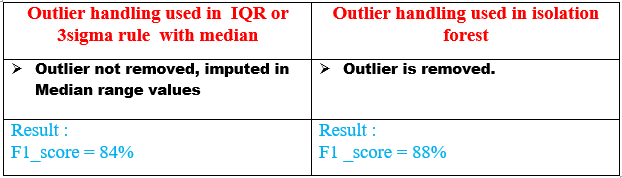
#### outlier hanling methods in outlier imputed using iqr or 3sigma rule with median and isolationforest used to removed the outlier both compared isolationforest give the better accuray.

## 7) statistical analysis..

In [19]:
df1.describe() # used to give statistical understand purpose..

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,4.732230e+05,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.00000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000,473223.000000
mean,7.426112e+05,0.020481,1.759321,1.341304,4.275405,0.411193,0.340672,0.446749,0.228753,0.135570,0.188928,0.000059,0.000095,0.001948,0.000082,0.002185,7.532451,0.732319,0.083257,0.116615,0.610145,0.403573,0.529655,8.267815,0.882163,-0.599007,0.253407,-0.258479,6.195599,0.954554,0.860246,1.331869,0.992953,61.488964,2.381260,0.370531,0.773325,0.290599,3.065850,0.44884,0.450776,0.447543,2.375605,1.873216,7.691845,2.991323,9.228298,2.335313,8.429056,5.436642,1.420485,2.857651,7.561479,0.096948,0.638786,0.557754,0.269501,0.332266,0.127828
std,4.251636e+05,0.141638,1.883141,0.629070,2.636279,0.492068,1.226639,0.497157,0.420030,0.342332,0.391452,0.007692,0.009751,0.044097,0.009078,0.047855,3.374282,0.442751,0.276270,0.320962,0.284401,0.365461,0.763838,2.431869,0.322421,0.730430,1.131062,0.830189,5.419087,0.226497,0.346732,0.967116,0.087142,31.983825,0.803679,0.048660,0.163322,0.324934,0.691189,0.28529,0.285209,0.285022,1.105099,1.117632,1.316325,1.397162,1.427660,1.224448,2.864327,2.315800,1.171781,1.673246,2.697467,0.295887,0.480353,0.496654,0.443701,0.471026,0.333898
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,-1.000000,0.100000,0.313241,-1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.772685e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.523808,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.663605,0.342053,2.828427,0.20000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.416350e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.703118,7.000000,1.000000,-1.000000,0.000000,-1.000000,6.000000,1.

In [20]:
# find the corelation in given data set
c=df1.corr()
c

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,1.000000,-0.002583,0.000501,0.002722,-0.000986,0.000673,-0.001983,0.000684,0.001353,0.000054,-0.002368,-0.000469,-0.000206,-0.002347,-0.001450,-0.002555,-0.000123,0.005800,-0.003733,-0.002170,-0.001160,-0.003730,-0.001225,-0.000146,0.000608,0.001266,0.001270,-0.000691,-0.001571,-0.000525,0.002062,0.001740,-0.000763,-0.000554,0.004658,-0.000934,-0.001574,-0.001765,-0.000355,-0.000069,0.000893,0.000270,0.003381,-0.000518,0.001958,-0.000377,-0.001016,0.000576,0.000486,-0.002103,0.000071,-0.000815,0.000084,0.001075,0.002038,-0.001075,-0.001879,0.002401,-0.002569
target,-0.002583,1.000000,0.001487,0.000571,-0.006396,0.006965,0.007568,-0.001947,0.008274,-0.002743,-0.004005,-0.001112,-0.001410,-0.004021,-0.001313,-0.004420,-0.006400,0.017906,-0.011445,-0.014142,0.020154,0.008147,0.020249,0.010714,0.007638,-0.005135,-0.014893,-0.010600,-0.005651,0.002336,0.006003,0.002584,0.004161,0.000789,0.013381,-0.000732,0.007053,0.006842,0.016893,0.002120,0.002002,-0.003553,0.001116,-0.006824,-0.002033,-0.003448,-0.001470,-0.002776,-0.001148,-0.002254,-0.008344,-0.002205,0.002224,-0.015562,0.010184,0.002801,-0.007364,-0.010051,-0.019343
ps_ind_01,0.000501,0.001487,1.000000,-0.004772,0.205325,0.072396,-0.003702,-0.275682,0.011525,0.175744,0.184067,-0.000476,-0.006694,-0.016976,-0.004155,-0.017871,0.125590,0.082236,0.052594,-0.124546,0.113446,0.182565,0.143065,-0.047261,-0.081215,0.018494,0.010408,0.187866,0.047674,0.000104,0.163581,-0.112815,0.010538,0.009981,0.007531,0.141349,0.076295,0.041025,-0.048856,-0.000675,0.000202,-0.002722,-0.001304,-0.001906,-0.001212,-0.004252,0.002253,0.000478,-0.001040,-0.001698,-0.003200,-0.000871,0.000883,-0.016566,0.004208,0.001558,-0.008207,-0.010041,-0.015682
ps_ind_02_cat,0.002722,0.000571,-0.004772,1.000000,-0.101550,0.138036,-0.019830,-0.133541,0.028819,0.033831,0.109093,0.000630,-0.002535,-0.008965,-0.002335,-0.009119,-0.003406,0.037602,-0.031930,-0.025180,0.059458,0.086343,0.072851,0.004454,0.047146,-0.016016,-0.052478,-0.023519,-0.008932,-0.006124,0.005747,0.010243,0.011651,0.022196,0.024542,-0.100379,-0.069431,-0.004693,0.005417,0.000875,0.000770,0.000636,-0.002116,-0.004442,0.000582,-0.002007,-0.002497,0.000421,-0.000759,0.001064,-0.002201,-0.001710,0.000884,-0.012436,0.007607,0.002323,-0.001460,-0.000345,-0.014536
ps_ind_03,-0.000986,-0.006396,0.205325,-0.101550,1.000000,-0.100535,0.042452,-0.018514,-0.069984,-0.007785,0.105414,0.002948,0.000461,0.001237,0.002054,0.002098,0.176980,0.011336,0.006425,-0.020132,0.002554,0.021355,-0.010938,-0.043143,-0.013389,0.078987,0.036486,0.124137,-0.016493,0.041965,0.011614,-0.021249,-0.007189,-0.031091,-0.053740,0.054270,0.013533,0.011862,-0.036875,0.000417,-0.001159,-0.001775,0.002747,-0.002683,0.000409,-0.000301,0.002435,-0.003092,-0.000154,-0.002863,-0.004736,-0.000678,-0.000203,-0.005388,0.002651,0.000931,-0.007818,-0.008908,-0.013322
ps_ind_04_cat,0.000673,0.006965,0.072396,0.138036,-0.100535,1.000000,0.000175,-0.324067,0.334219,0.065759,-0.004550,0.000830,-0.001983,-0.006634,-0.001910,-0.006746,0.086565,0.028925,0.000644,-0.034342,0.021629,0.083766,0.067148,0.033913,0.012006,0.024896,-0.039386,0.070560,0.028454,0.067956,-0.007614,-0.048544,0.021996,0.009285,0.053767,-0.088849,-0.014450,-0.008125,0.048598,-0.004194,0.000261,-0.000488,0.000534,-0.00

## 8) feature engineering..

* 1)scaling
* 2)encorder concept-no need.because all the columns have numerical data.


In [21]:
# get the clear data ,means without outlier and with out NAN values and with out duplicates..
df1.drop(["id"],axis=1,inplace=True)

## 9)create the model..

In [22]:
df1.shape

(473223, 58)

In [23]:
x=df1.drop(["target"],axis=1)
x

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595206,0,1,2,0,0,0,0,0,1,0,0,0,0,0,2,1,0,0,0.9,0.2,0.653835,7,1,-1,8,-1,13,1,1,2,1,20,3,0.447214,0.903506,0.429535,3.000000,0.1,0.8,0.8,3,2,8,3,10,2,11,8,0,1,7,0,1,1,0,0,0
595207,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595209,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0


In [24]:
y=df1.target
y

0         0
1         0
2         0
3         0
4         0
         ..
595206    0
595207    0
595209    0
595210    0
595211    0
Name: target, Length: 473223, dtype: int64

#### this dataset the company has not shared the names of the features. so, we can reduce they no of features to create the new features.main reason for running time reduced purpose..

## PCA :

* principal component analysis is very popular dimensional reduced algorithm without variation of accuracy.pca is unsupervised learning algorithm , but support in supervised learning also.

* number of components choosing is big task in principal component algorithm.
* number of components selected using graphical analysis into relationship between explained_variance_ratio and Number of Components. 

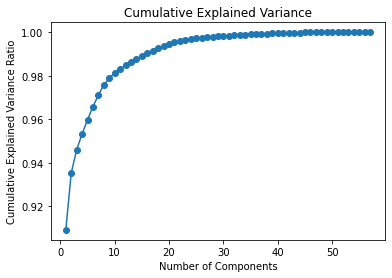

In [25]:
# find the number of components
pca = PCA()
pca.fit(x)
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)
# Plotting the cumulative explained variance
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance')
plt.show()

#### above graph to analysis no of components 2 is given the explained_variance_ratio is 93% .this is well and running time is fast.

In [26]:
pca=PCA(n_components=2)
pca=pca.fit_transform(x)
print("new features shape :",pca.shape)

new features shape : (473223, 2)


In [27]:
x_train,x_test,y_train,y_test=train_test_split(pca,y,test_size=0.20,random_state=4)

In [28]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [29]:
from imblearn.over_sampling import SMOTE,ADASYN,RandomOverSampler
from collections import Counter
smote=SMOTE(random_state=2)
x_sm,y_sm=smote.fit_resample(x_train,y_train)
print("before balanced :",Counter(y_train))
print("after balanced :",Counter(y_sm))
over=RandomOverSampler(random_state=4)
x,y=over.fit_resample(x_sm,y_sm)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=4)

before balanced : Counter({0: 370789, 1: 7789})
after balanced : Counter({0: 370789, 1: 370789})


In [30]:
df=pd.DataFrame(x_train,columns=["features1","features2"]) # data set new features..
df

,features1,features2
0,0.922684,-1.122449
1,1.326432,0.951788
2,0.388092,1.424447
3,-0.578163,-0.994169
4,-1.331709,1.560515
...,...,...
593257,-0.077801,-0.981691
593258,1.389046,0.964536
593259,-1.330339,0.806713
593260,-1.330318,0.643854


## 1)LogisticRegression

In [31]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix
model=LogisticRegression()
model.fit(x_train,y_train)
pre=model.predict(x_test)
pre1=model.predict(x_train)
test=accuracy_score(y_test,pre)
train=accuracy_score(y_train,pre1)
f1=f1_score(y_test,pre)
recall=recall_score(y_test,pre)
precision=precision_score(y_test,pre)
print("test accuraccy :",test)
print("train accuraccy :",train)
print(" f1 score :",f1)
print("recall score :",recall)
print("precision score :",precision)


test accuraccy : 0.5071738720030206
train accuraccy : 0.505575951266051
 f1 score : 0.5116909839132062
recall score : 0.5168844139718188
precision score : 0.506600878353352


In [32]:
confusion_matrix(y_train,pre1)

array([[146797, 149768],
       [143555, 153142]], dtype=int64)

In [33]:
pd.crosstab(y_train,pre1)# similar to confusion matrix.

col_0,0,1
target,,
0,146797,149768
1,143555,153142


In [34]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       0.51      0.50      0.50     74224
           1       0.51      0.52      0.51     74092

    accuracy                           0.51    148316
   macro avg       0.51      0.51      0.51    148316
weighted avg       0.51      0.51      0.51    148316



## 2)decision tree..

In [35]:
dt=DecisionTreeClassifier(criterion='gini',min_samples_leaf=10,min_samples_split=10,class_weight="balanced",)
dt.fit(x_sm,y_sm)
predict=dt.predict(x_test)
test1=accuracy_score(y_test,predict)# (or)dt.score(x_test,y_test)
predict_train=dt.predict(x_train)
train1=accuracy_score(y_train,predict_train)
print("test accuracy :",test1)
print("train accuracy :",train1)
print("f1 score :",f1_score(y_test,predict))
print("recall score :",recall_score(y_test,predict))
print("precision score :",precision_score(y_test,predict))


test accuracy : 0.8581137571131907
train accuracy : 0.8593690477394473
f1 score : 0.8593898250724967
recall score : 0.8679614533282946
precision score : 0.8509858409421728


In [36]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86     74224
           1       0.85      0.87      0.86     74092

    accuracy                           0.86    148316
   macro avg       0.86      0.86      0.86    148316
weighted avg       0.86      0.86      0.86    148316



In [37]:
pd.crosstab(y_test,predict)

col_0,0,1
target,,
0,62963,11261
1,9783,64309


## 3)RandomForestClassifier

In [38]:
rf=RandomForestClassifier(min_samples_split=10,min_samples_leaf=20,class_weight="balanced",
                          n_estimators=100,max_features='auto')
rf.fit(x_sm,y_sm)
predict1=rf.predict(x_test)
test2=accuracy_score(y_test,predict1)# (or)dt.score(x_test,y_test)
predict_train1=rf.predict(x_train)
train2=accuracy_score(y_train,predict_train1)
print("test accuracy :",test2)
print("train accuracy :",train2)
print("f1 score :",f1_score(y_test,predict1))
print("recall score :",recall_score(y_test,predict1))
print("precision score :",precision_score(y_test,predict1))

test accuracy : 0.8303217454623911
train accuracy : 0.8318887776395589
f1 score : 0.8366862215761603
recall score : 0.8700669437996005
precision score : 0.8057722113894306


In [39]:
print(classification_report(y_test,predict1))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82     74224
           1       0.81      0.87      0.84     74092

    accuracy                           0.83    148316
   macro avg       0.83      0.83      0.83    148316
weighted avg       0.83      0.83      0.83    148316



In [40]:
pd.crosstab(y_test,predict1)# similar to the confision_matrix

col_0,0,1
target,,
0,58685,15539
1,9627,64465


## 4)BaggingClassifier

* bagging is a ensemble technique used to reduce the overfitting and improve the accuracy.
* bagging fully focused on variance.
* variance is a one type of error in difference between actual test data and predict test data 
* decision tree and random forest both accuracy is not that much difference.main reason decision tree to implement the bagging classifier is test and train accuracy lightly variation and running time speed is fast..


In [41]:
bag=BaggingClassifier(base_estimator=dt,n_estimators=20)
bag.fit(x_sm,y_sm)
predict6=bag.predict(x_test)
test6=accuracy_score(y_test,predict6)# (or)dt.score(x_test,y_test)
predict_train6=bag.predict(x_train)
train6=accuracy_score(y_train,predict_train6)
print("test accuracy :",test6)
print("train accuracy :",train6)
print("f1 score :",f1_score(y_test,predict6))
print("recall score :",recall_score(y_test,predict6))
print("precision score :",precision_score(y_test,predict6))

test accuracy : 0.8662383020038297
train accuracy : 0.8667418442441956
f1 score : 0.8713215501864765
recall score : 0.9065486152351131
precision score : 0.838729817814018


In [42]:
print(classification_report(y_test,predict6))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86     74224
           1       0.84      0.91      0.87     74092

    accuracy                           0.87    148316
   macro avg       0.87      0.87      0.87    148316
weighted avg       0.87      0.87      0.87    148316



## Result analysis..

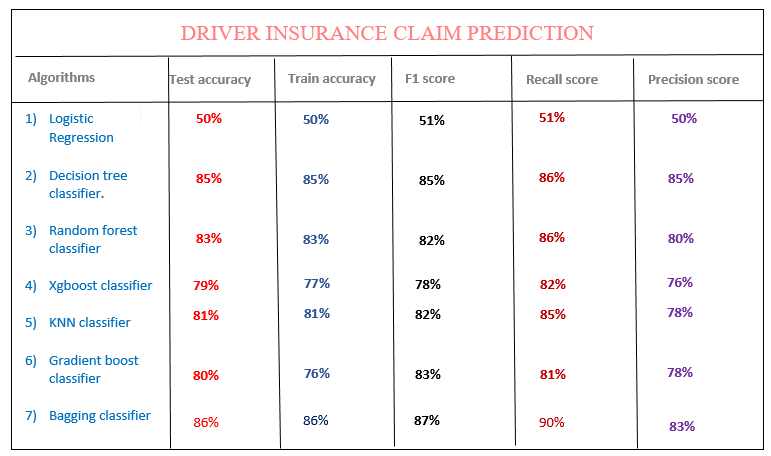

#### supervised learning  some algorithm used to predict the value, bagging classifier ensemble technique give the better result compare with other algorithms.so, we implement and deployement in bagging classifier algorithm.(reference view in above table)

In [43]:
m=pd.DataFrame(x_test,columns=["feature1","feature2"])
m

,feature1,feature2
0,0.859959,-1.103939
1,-0.078433,-0.941486
2,0.296975,-0.955441
3,-1.140763,-1.190590
4,1.547156,-0.344170
...,...,...
148311,-1.328476,-1.006312
148312,-0.796870,-1.223965
148313,-1.079487,0.081319
148314,-1.330353,0.468862


In [44]:
# calculate the proaablity of predict insurance claim(1) or not(0)
d=pd.DataFrame(bag.predict_proba(x_test))
d

,0,1
0,0.581443,0.418557
1,0.991304,0.008696
2,0.847063,0.152937
3,0.652970,0.347030
4,0.174628,0.825372
...,...,...
148311,0.433721,0.566279
148312,0.452169,0.547831
148313,0.484679,0.515321
148314,0.988371,0.011629


In [45]:
v=pd.DataFrame(predict6)
v

,0
0,0
1,0
2,0
3,0
4,1
...,...
148311,1
148312,1
148313,1
148314,0


In [46]:
result=pd.concat([m,v],axis=1)

In [47]:
# check the result in 20% test data ..
result

,feature1,feature2,0
0,0.859959,-1.103939,0
1,-0.078433,-0.941486,0
2,0.296975,-0.955441,0
3,-1.140763,-1.190590,0
4,1.547156,-0.344170,1
...,...,...,...
148311,-1.328476,-1.006312,1
148312,-0.796870,-1.223965,1
148313,-1.079487,0.081319,1
148314,-1.330353,0.468862,0


## save the result..

In [48]:
result.to_csv("main result.csv",index=False)

## create the deployment..

In [49]:
# pickle module used to convert the user code to computer understanding code format.
import pickle as plk
plk.dump(bag,open("insurance_claim.pkl","wb"))

In [52]:
read=plk.load(open("insurance_claim.pkl","rb"))
read.predict(x_test)
#check the prediction
a=float(input("enter the feature 1 :"))
b=float(input("enter the feature 2 :"))
result = read.predict([[a,b]])
print("\n")
if result==0:
    print("driver NOT possible to claim the insurance")
else:
    print("driver possible to claim the insurance")

enter the feature 1 :-1.328476	
enter the feature 2 :-1.006312


driver possible to claim the insurance


##### deployment flask framework is not support in jupyter notebook. we create the link and code using pycharm IDE.